<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

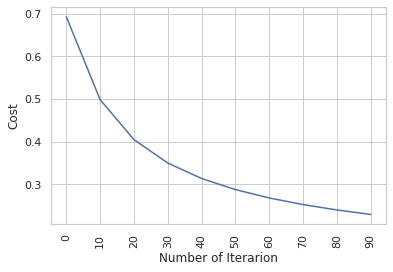

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [10]:
# importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

# reading the dataset

data = pd.read_csv("cancer.csv")
print(data.head)
data.info()

# dropping id as it has no role in prediction

data.drop(['id'], axis=1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis=1)

# Normalizing the dataset
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# Splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


# weight and bias
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b


# Sigmoid Function
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head


# Forward-Backward Propagation- the forward propagation is used to calculate the cost function and
# the output, y, while the backward propagation is used to calculate the gradient descent.
def forward_backward_propagation(w, b, x_train, y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
    # x_train.shape[1] is for scaling
    cost = (np.sum(loss)) / x_train.shape[1]

    # backward propagation
    derivative_weight = (np.dot(x_train, (
        (y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(
        y_head - y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,
                 "derivative_bias": derivative_bias}
    return cost, gradients


# Updating Parameters
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)

        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration % i: % f" % (i, cost))

    # update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


# Predictions
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    # if z is bigger than 0.5, our prediction is sign one (y_head = 1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
    for i in range(z.shape[1]):
        if z[0, i] <= 0.5:
            Y_prediction[0, i] = 0
        else:
            Y_prediction[0, i] = 1

    return Y_prediction

#Logistic Regression
def logistic_regression(x_train, y_train, x_test, y_test,
                        learning_rate, num_iterations):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(
        w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_test = predict(
        parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(
        parameters["weight"], parameters["bias"], x_train)

    # train / test Errors
    print("train accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))


logistic_regression(x_train, y_train, x_test,
                    y_test, learning_rate = 1, num_iterations = 100)